## Gradient Descent Algorithm

Gradient Descent is an iterative optimization algorithm used to find a local minimum/maximum of a given function. <br>
In this case, we will use GD and its different variations, to fit a straight line through randomly generated data using numpy.<br><br>
There are three different types of GD:
-  Batch Gradient Descent
-  Stochastic Gradient Descent
-  Mini-Batch Gradient Descent

### Importing Libraries

In [1]:
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

### Creating sample data

In [2]:
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.rand(100, 1)

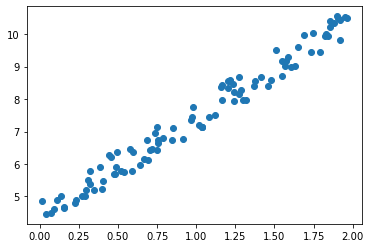

In [3]:
plt.scatter(X, y)

In [4]:
X_b = np.c_[np.ones((100, 1)), X] 

### By Normal Equations

In [5]:
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

In [6]:
theta_best

array([[4.35684971],
       [3.08452543]])

In [7]:
X_check = np.array([[2], [0]])
X_check = np.c_[np.ones((2, 1)), X_check]

In [8]:
y_check = X_check.dot(theta_best)

In [9]:
y_check

array([[10.52590057],
       [ 4.35684971]])

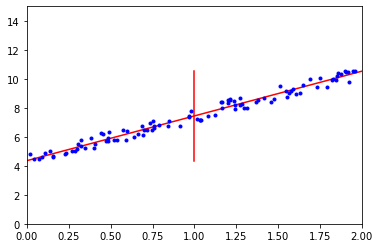

In [10]:
plt.plot(X_check, y_check, "r-")
plt.plot(X, y, "b.")
plt.axis([0, 2, 0, 15])
plt.show()

### LinearRegression from Scikit Learn uses SVD

The LinearRegression uses a Standard Matrix Factorization Technique called SVD. SVD computes the pseudo-inverse.<br>
In some cases, the matrix X can be singular, which means that its inverse is not possible. In that case, we find its pseudo inverse.

In [11]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X, y)
model.intercept_, model.coef_

(array([4.35684971]), array([[3.08452543]]))

### Why we use GD?

Normal equations are good when it comes to data having relatively less features. But it gets computationally complex as the number of features increases <br><br>
The time complexity of inverting a matrix in case of normal equations is O(N^3), where N is the number of features.
<br>
Time complexity of computing pseudo inverse using SVD is O(N^2)
<br><br>
Hence, we need an iterative technique which is computationally less complex. This is where GD comes into play.

### Batch Gradient Descent

In case of Batch Gradient Descent, we take the whole training set and use it to compute the cost function. This not only makes it slow but it also makes Batch GD prone to getting stuck at local minima. <br>
<br> In case of Linear Regression, we don't have to care about local minima because the Cost Function for LR is a convex function. 

In [12]:
class batch_GD:
    
    # Constructor
    def __init__(self, iters, rate):
        self.iters = iters
        self.rate = rate
      
    # This method is used to fit the model to the training data
    def fit(self, X_train, y_train):
        self.X_train = X_train
        self.y_train = y_train
        m = len(X_train)
        
        X_train = np.c_[np.ones((m, 1)), X_train]
        
        theta = np.random.rand(X_train[0].shape[0],1)

        for i in range(self.iters):
            g_vector = 2/m * X_train.T.dot(X_train.dot(theta) - y_train)
            theta = theta - self.rate * g_vector
        
        self.theta_ = theta
        return theta
    
    # This method is used to predict based on the learned model
    def predict(self, X_test):
        self.X_test = X_test
        y_test = X_test.dot(self.theta_)
        
        return y_test

In [13]:
batch_obj = batch_GD(1000,0.1)

In [14]:
batch_obj.fit(X, y)

array([[4.35684971],
       [3.08452543]])

In [15]:
batch_obj.theta_

array([[4.35684971],
       [3.08452543]])

In [16]:
batch_obj.predict(X_check)

array([[10.52590057],
       [ 4.35684971]])

### Stochastic Gradient Descent

In case of Stochastic Gradient Descent, we take a random instance from our training set and use it to compute our cost function. <br>
<br>
This makes SGD able to escape any local minima because random instances makes Cost Function change erratically. But we don't want it to change this erratically all the time, so we decrease the learning rate slowly. <br>

In [17]:
class stochastic_GD:
    
    # Constructor
    def __init__(self, epochs, T):
        self.epochs = epochs
        self.t0 = T[0]
        self.t1 = T[1]
       
    # This method is used to fit the model to the training data
    def fit(self, X_train, y_train):
        self.X_train = X_train
        self.y_train = y_train
        
        m = len(X_train)
        X_train = np.c_[np.ones((m, 1)), X_train]
        theta = np.random.rand(X_train[0].shape[0], 1)
        
        for epoch in range(self.epochs):
            for i in range(m):
                index = np.random.randint(m)
                xi = X_train[index:index+1]
                yi = y_train[index:index+1]
                gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
                rate = self.learning_schedule(epoch * m + i)
                theta = theta - rate * gradients
        
        self.theta_ = theta
        return theta
    
    # This method decreases the learning rate over time
    def learning_schedule(self, t):
        self.t = t
        return self.t0/(t + self.t1)
    
    # This method is used to predict values
    def predict(self, X_test):
        self.X_test = X_test
        y_test = X_test.dot(self.theta_)
        
        return y_test

In [18]:
stochastic_obj = stochastic_GD(50, T=(5,10))

In [19]:
stochastic_obj.fit(X, y)

array([[4.33552442],
       [3.09330839]])

In [20]:
stochastic_obj.predict(X_check)

array([[10.5221412 ],
       [ 4.33552442]])

In [21]:
stochastic_obj.theta_

array([[4.33552442],
       [3.09330839]])

### Mini-Batch Gradient Descent

In case of Mini-Batch Algorithm, we try to find the middle way between BGD and SGD. <br>
Instead of taking whole dataset or a random instance from the dataset, we take subsets of the dataset (called mini-batches, hence the name Mini-Batch GD) and use them to compute the cost function.

In [26]:
class mini_batch_SD:
    
    # Constructor 
    def __init__(self, batch_size, rate, epochs):
        self.batch_size = batch_size
        self.rate = rate
        self.epochs = epochs
        
    # This method is used to create mini-batches
    def create_batches(self, X_train, y_train):
        self.X_train = X_train
        self.y_train = y_train
        
        mini_batches = []
        data = np.stack((X_train, y_train), axis=1)
        no_of_batches = X_train.shape[0] // self.batch_size
        for i in range(no_of_batches):
            mini_batch = data[i*self.batch_size: (i+1)*self.batch_size]
            mini_batches.append((mini_batch[:, 0], mini_batch[:, 1]))

        if (X_train.shape[0] % self.batch_size)!=0:
            mini_batch = data[i*batch_size:]
            mini_batches.append((mini_batch[:, 0], mini_batch[:, 1]))

        self.mini_batches = mini_batches
    
    # This method fits the model to the mini-batches iteratively
    def fit(self):
        x = self.mini_batches[0][0].shape[1] + 1
        theta = np.random.rand(x,1)
        for epoch in range(self.epochs):
            for mini_batch in self.mini_batches:
                X_c = []
                for i in range(self.batch_size):
                    x = mini_batch[0][i]
                    xc = np.c_[np.ones((1,1)), x]      
                    X_c.append(xc[0])
                X_c = np.array(X_c)
                yi = mini_batch[1]
                gradients = 2/self.batch_size * X_c.T.dot(X_c.dot(theta) - yi)
                theta = theta - self.rate * gradients
                
        self.theta_ = theta        
        return theta
    
    # This method is used to predict based on the learned model
    def predict(self, X_test):
        self.X_test = X_test
        y_test = X_test.dot(self.theta_)
        
        return y_test
    
    

In [27]:
mini_batch_obj = mini_batch_SD(4,0.1,100)

In [28]:
mini_batch_obj.create_batches(X,y)

In [29]:
mini_batch_obj.fit()

array([[4.33652066],
       [3.09034444]])

In [30]:
mini_batch_obj.predict(X_check)

array([[10.51720954],
       [ 4.33652066]])

In [31]:
mini_batch_obj.theta_

array([[4.33652066],
       [3.09034444]])